In [150]:
#nahrani knihoven
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from keras import Sequential
from keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import collections
from sklearn import *

df = pd.read_csv('ReadyBanking.csv', sep=';', index_col=0)
df.head(5)

,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,Bank_Assurance_Amount,...,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum,New_Credit_Card_Flag
0,M,UpperMid,Normal,False,False,False,False,False,0.000000,True,...,True,False,20044.611429,False,False,False,False,False,0,0
1,F,Older,Normal,False,False,False,False,False,0.000000,False,...,False,True,2430.224286,True,True,False,False,False,7,0
2,M,UpperMid,Normal,True,False,False,False,False,18.825714,False,...,False,False,0.000000,False,False,False,False,False,0,0
3,M,UpperMid,Normal,False,True,False,False,False,603.791429,False,...,False,False,0.000000,True,True,False,False,True,26,0
4,F,Older,Normal,False,False,False,False,False,0.000000,False,...,False,True,2.720000,False,False,False,False,False,0,0


In [151]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#lrDf = pd.DataFrame(data=df)



#le = preprocessing.LabelEncoder()
#le.fit(df['Gender'])
#lrDf['Gender']=le.transform(lrDf['Gender'])


#le.fit(lrDf['Age_Cat'])
#lrDf['Age_Cat']=le.transform(lrDf['Age_Cat'])

#le.fit(lrDf['Ten_Cat'])
#lrDf['Ten_Cat']=le.transform(lrDf['Ten_Cat'])



#lrDf.head()

In [166]:
df = df.apply(LabelEncoder().fit_transform) #Prekodovani vsech sloupcu pro zpracovanni modelama

In [167]:
#Split na featury a cilovou promennou
X = df.drop(['New_Credit_Card_Flag'], axis=1)
y = df['New_Credit_Card_Flag']



In [168]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104728    0
104729    0
104730    0
104731    0
104732    0
Name: New_Credit_Card_Flag, Length: 104733, dtype: int64

In [169]:
#y.drop(y.tail(2).index, inplace=True)
X

,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,Bank_Assurance_Amount,...,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum
0,1,2,2,0,0,0,0,0,0,1,...,0,1,0,26291,0,0,0,0,0,0
1,0,1,2,0,0,0,0,0,0,0,...,0,0,1,14405,1,1,0,0,0,7
2,1,2,2,1,0,0,0,0,8919,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,0,1,0,0,0,41937,0,...,0,0,0,0,1,1,0,0,1,26
4,0,1,2,0,0,0,0,0,0,0,...,0,0,1,398,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104728,1,2,0,1,0,0,0,0,23890,0,...,0,0,0,0,1,0,0,0,0,1
104729,0,1,0,1,0,0,0,0,8012,0,...,0,0,0,0,1,0,0,0,0,1
104730,1,3,0,0,0,0,0,0,0,0,...,0,0,1,1469,0,0,0,0,0,0
104731,1,0,0,0,0,0,0,0,0,0,...,0,0,1,5258,0,0,0,0,0,0


In [170]:
#Split na trenovaci a testovaci data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [171]:
#nacteni Scaleru -> prekoduje aby mean sloupcu byl 0 a std 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,Bank_Assurance_Amount,...,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum
53030,0,1,2,1,0,0,0,0,24154,0,...,0,0,0,0,0,0,0,0,0,0
17401,1,1,1,1,0,0,0,1,65970,0,...,0,0,0,0,1,1,0,0,0,3
75266,0,0,2,0,1,0,0,0,60735,0,...,0,0,0,0,1,1,0,0,0,11
30999,0,1,3,0,0,0,0,1,28580,0,...,0,0,0,0,0,0,0,0,0,0
8899,0,2,1,1,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64956,1,1,3,1,0,0,0,0,6348,0,...,0,0,0,0,0,0,0,0,0,0
72158,1,0,2,1,0,0,0,0,41520,0,...,0,0,0,0,1,1,0,0,0,7
89811,1,3,0,0,0,0,0,0,0,0,...,0,0,1,10729,1,1,0,0,0,4
19243,1,2,3,0,0,0,0,1,48193,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
#jednoducha neuronova sit a jeji natrenovani
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
model = MLPClassifier(max_iter=100)
#specifikace parametru
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#nalezeni nejlepsich parametru
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
#trenovani
clf.fit(train_scaled, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [173]:
#predikce
mlp_pred = clf.predict(test_scaled)

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, mlp_pred)

0.9594691363918461

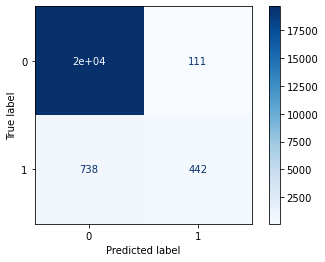

In [185]:
#confusion matice

disp = plot_confusion_matrix(clf, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [181]:
mlpPred = pd.DataFrame({
        'ActualValues': np.array(y_test).flatten(),
        'PredictedValues': mlp_pred})
mlpPred.head(30)

,ActualValues,PredictedValues
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,1,0
9,0,0


In [182]:
mlpPred['PredictedValues'].value_counts() #well ,that's bad ->predikuje všechno jako False

0    20394
1      553
Name: PredictedValues, dtype: int64

In [183]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [184]:
logRegScore = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('logRegScore :', logRegScore*100,'%')

logRegScore : 94.290351840359 %


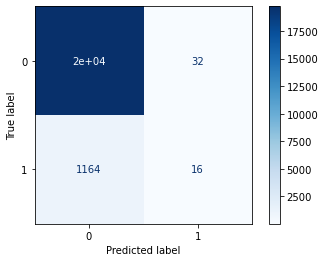

In [188]:
disp = plot_confusion_matrix(model, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [80]:
#Gradient boosted deTrees, nejlepsi model, jen trva dlouho pri hodne datech
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
#vypis parametru
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
#vyber nejlepsich parametru
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
#trenovani
rs.fit(X_train, y_train)

#predikce
y_pred = rs.best_estimator_.predict(X_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mates\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.9442853  0.94109854 0.94479853        nan]
  warnings.warn(
C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:48:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [81]:
accuracy_score(y_test, y_pred)

0.9439060485988447

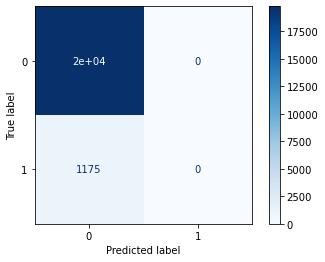

In [34]:
disp = plot_confusion_matrix(rs.best_estimator_, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()
#tady můžeme vidět, model je ve výsledku přesný, ale predikuje akorát tak hodnoty False, takže je k ničemu


In [35]:
#proto teď zkusíme vyřešit situaci imbalanced class pomocí oversamplingu i undersamplingu

In [189]:
#reseni celeho problemu nevybalancovaneho datasetu 
#Nasampluje hodnoty s vyslednou promennou True a vemi podobnymi hodnoty aktualnim hodnotam s koncovou promennou True
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority")

X_res, y_res = ros.fit_resample(X,y)

In [190]:
#Nyní jsou hodnoty vyrovnané
y_res.value_counts()

0    98933
1    98933
Name: New_Credit_Card_Flag, dtype: int64

In [191]:
#A teď vše znovu
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [192]:
#scaler upravi hodnoty aby byl mean 0 a std 1 pro kazdou feature zvlast
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [193]:
#Znovu to samé akorát s vybalancovaným datasetem
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
rs.fit(train_scaled, y_train)


y_pred = rs.best_estimator_.predict(test_scaled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mates\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.94185429 0.97155888 0.90703258        nan]
  warnings.warn(
C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:56:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [194]:
rs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1,
 'learning_rate': 0.3583883653988028,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 354,
 'subsample': 0.8}

In [195]:
rs.best_score_

0.9715588774273923

In [196]:
accuracy_score(y_test, y_pred)

0.9753373426997524

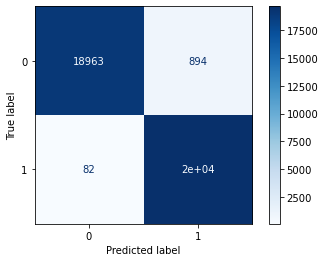

In [197]:
disp = plot_confusion_matrix(rs.best_estimator_, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [198]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18963,   894],
       [   82, 19635]], dtype=int64)

In [199]:
#Znovu neuronka
model = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)

clf.fit(train_scaled, y_train)

C:\Users\mates\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [200]:
#nasazeni modelu
mlp_pred = clf.predict(test_scaled)

In [201]:
#sice to trva milion dni, ale krasny vysledek, v matici nize je i videt ze to neni jen 93% False
accuracy_score(y_test, mlp_pred)

0.9373831303381007

In [202]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, mlp_pred)

array([[18130,  1727],
       [  751, 18966]], dtype=int64)

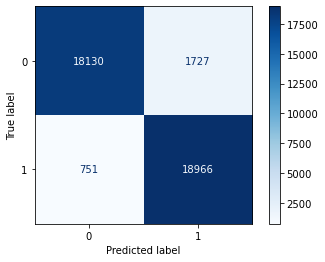

In [203]:
disp = plot_confusion_matrix(clf, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [204]:
#Logisticka regrese, spise demonstrativni, oproti mlp a gradient boostingu nema sanci
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [205]:
logRegScore = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('logRegScore :', logRegScore*100,'%')

logRegScore : 71.5419214635872 %


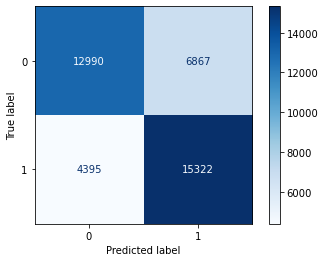

In [206]:
disp = plot_confusion_matrix(model, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()